## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Loading the dataset as a dataframe
df = pd.read_csv('ab_data.csv')
# Displaying the 1st 5 rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Displaying the number of rows in the dataset
df.shape[0]

294478

###### The number of rows of the dataset equals 294478

c. The number of unique users in the dataset.

In [4]:
# Getting the number of unique users
df.nunique().user_id

290584

###### The number of unique users in the dataset equals 290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

###### The proportion of users converted = 0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# Getting the number of times the treatment lines up with old page 
# and adding this to the number of times the new_page lines up with the control
# this provides us with total number of times the treatment and new page don't line up.
df.query('group == "treatment" and landing_page != "new_page"').shape[0]+df.query('group == "control" and landing_page == "new_page"').shape[0]

3893

###### To get the total number of cases that no treatment-new_page line up:
###### 1st get the times the treatment doesn't line up with new_page (or line up with old_page )

###### 2nd get the times the new_page doesn't line up with treatment ( or line up with control )

###### Adding both together provides us with the number of times the new_page and treatment don't line up.

f. Do any of the rows have missing values?

In [7]:
# Checking nan values by getting a boolean test in one word.
df.isna().any().all()

False

###### An overall boolean checking for missing values in one word says that there are no missing values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Filtration to get a dataset containing only truly lined up data; treatment with new_page and control with old_page.
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


###### A dataset containing only truly lined up data; [ treatment with new_page ] and [ control with old_page ] is the result showing 290585 rows.

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

###### Zero value indicating that the undesired rows were cleaned up.

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# Getting the number of unique user ids in df2
'Number of unique users = {}'.format(str(df2.nunique().user_id))

'Number of unique users = 290584'

###### A number of 290584 unique users from a total of 290585 indicates that there is only one repeated user.

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# Getting the repeated user_id from a series of value counts.
repeated_user_id = pd.DataFrame(df2.user_id.value_counts()).query('user_id > 1').index[0]
'The repeated user_id is : {}'.format(str(repeated_user_id))

'The repeated user_id is : 773192'

###### By accessing the user_id value counts as a dataframe; the repeated user_id is accessed from the index of the count whose value is greater than one. 

c. What is the row information for the repeat **user_id**? 

In [12]:
# Getting all rows of the repeated_user_id
df2[df2['user_id']==repeated_user_id]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


###### A boolean mask to simply get the data whose user_id = repeated_user_id.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# Removing the duplicates based on user_id.
df2.drop_duplicates(subset=['user_id'], inplace=True)
df2[df2['user_id']==repeated_user_id]

<ipython-input-13-27bc985e92b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(subset=['user_id'], inplace=True)


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


###### Defining the user_id as the subset for the drop_duplicates function has achieved removing the duplicated user_id keeping the df2 name as it. 

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# Getting the probability of an individual converting regardless of the page they receive.
(df2.converted == 1).mean()

0.11959708724499628

###### Boolean filtration with calling the mean function allow getting the probability of an individual converting regardless of the page they receive.

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# Getting the probability a control was converted.
control_converted_prop = ((df2.query('group == "control"')).converted == 1).mean()
control_converted_prop

0.1203863045004612

###### I have used the query and boolean mask to filter all control groups with  a converted  = 1 to get the probability a control group was converted. 

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# # Getting the probability a treatment was converted.
treatment_converted_prop = ((df2.query('group == "treatment"')).converted == 1).mean()
treatment_converted_prop

0.11880806551510564

###### I have used the query and boolean mask to filter all treatment groups with a converted = 1 to get the probability a treatment group was converted.

In [17]:
# Observed difference in conversion between control and treatment groups
obs_diff = treatment_converted_prop - control_converted_prop
obs_diff

-0.0015782389853555567

###### This observed difference is used to get p-value as shown below in A/B testing section.

d. What is the probability that an individual received the new page?

In [18]:
# Getting the probability that an individual received the new page.
df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]

0.5000619442226688

###### Dividing the rows of the query by the rows of all data provides us with the probability that an individual received the new page.

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**From the results above we found that:**

**the probability a treatment group was converted is 0.11880806551510564**

**The probability a control group was converted is 0.0.1203863045004612**

**>>> Although small the difference between the 2 groups says that the control group is still better leading to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

## $H_{0}$   ( $P_{old}$ >= $P_{new}$ )  => Null hypothesis
## $H_{1}$  ( $P_{old}$ < $P_{new}$ )     => Alternative hypothesis

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
# Getting the convert rate for  𝑝(𝑛𝑒𝑤) under the null
p_new = (df2.converted == 1).mean()
p_new

0.11959708724499628

###### A boolean mask with the mean() function solves the problem.

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
# Getting the convert rate for  𝑝(old) under the null
p_old = (df2.converted == 1).mean()
p_old

0.11959708724499628

###### Assuming the conversion rate is equal regardless of the page tells us to use the boolean mask on converted feature directly with mean function as above to get the same value of that of $P_{new}$.

c. What is $n_{new}$?

In [21]:
# Querying the number of treatment data
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

###### $n_{new}$ or the number of rows of the treatment group has got directly by a simple query and the zero index of shape. 

d. What is $n_{old}$?

In [22]:
# Querying the number of control data
n_old = df2.query('group == "control"').shape[0]
n_old

145274

###### $n_{old}$ or the number of rows of the control group has got directly by a simple query and the zero index of shape. 

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
# Simulation
new_page_converted = np.random.choice([0,1], n_new, p=(p_new, 1-p_new))
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

###### Transactions of p_new transactions and storing all possible 1 and 0 values in an array.

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
# Simulation
old_page_converted = np.random.choice([0, 1], n_old, p=(p_old, 1-p_old))
old_page_converted

array([0, 1, 1, ..., 1, 0, 1])

###### Transactions of p_old transactions and storing all possible 1 and 0 values in an array.

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
# p_new - p_old
new_page_converted.mean() - old_page_converted.mean()

-0.00030758267647479354

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
# Simulations done by a clean non-expensive code
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

In [45]:
p_diffs

array([ 1.33980734e-03,  2.67538375e-03, -2.28700794e-05, ...,
       -7.65933019e-04, -5.52602837e-04,  1.93852732e-03])

###### Simulated differences between old and new probabilities as a numpy array to be plotted for distribution.

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

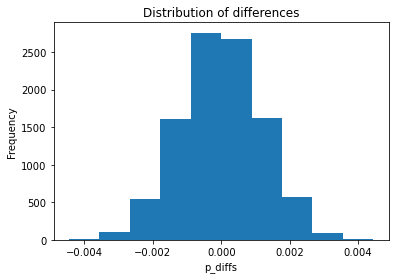

In [46]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Distribution of differences');

**The plot looks like what I expected as it shows a normal distribution**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [47]:
# Getting a list of all p_diffs that are greater than observed difference in conversion rate
(p_diffs > obs_diff).mean()

0.9065

**What a large value having an impact on decision.**

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Getting a list of all p_diffs that are greater than observed difference in conversion rate then getting the mean of that yiels a value of 0.9118**

**This value is called p_value**

**The p_value is very large leading to failure of null rejection i.e; the null hypothesis is favoured which tell us that the old page is still better in conversion than the new one.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm
# Getting converted count in both old and new groups
convert_old = df2.query('landing_page == "old_page" and converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').shape[0]
# Getting size of each group
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
# from statsmodels.stats.proportion import proportions_ztest
zstat, pval = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print('z_score  = {}'.format(zstat))
print('p_value = {}'.format(pval))

z_score  = 1.3109241984234394
p_value = 0.9050583127590245


###### The above proportions_ztest takes the number of successes of both the control and the treatment groups and their sizes  to act.
###### The "alternative" parameter defines the state of the alternative hypothesis which tells us that the proportion of the 1st group ( control ) is smaller than that of the 2nd group ( treatment ).
###### z_score and p_value are accessed in a simple step.

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [31]:
# To assess the effect of z-score; calculation of critical value is necessary
from scipy.stats import norm
# Critical value at 95% confidence level: 
print('Critical value at 95% confidence level = {}'.format(norm.ppf(1-(0.05))))

Critical value at 95% confidence level = 1.6448536269514722


**Answer**
###### The resultant z-score is less than the critical value => Fail to reject the null hypothesis.
###### p-value is large => Fail to reject the null hypothesis.
###### => => => This is an agreement with the findings in parts j. and k. which states that the old page is still better than the new page in conversion rate.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer => Logistic regression is used.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
# Creating the intercept and dummy variables
df2['intercept'] = 1
df2[['x', 'ab_page']] = pd.get_dummies(df2.group)
df2.drop('x', axis=1, inplace=True)

<ipython-input-32-d5d3a37737e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] = 1
C:\Users\drhan\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\drhan\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [33]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1


###### The intercept and ab_page are created as shown.

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
import statsmodels.api as sm
lm = sm.OLS(df2.converted, df2[['intercept', 'ab_page']])
fitted = lm.fit()

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
summary = fitted.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Mon, 29 Mar 2021   Prob (F-statistic):              0.190
Time:                        13:30:16   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

###### => The p-value associated with ab_page = 0.190 => it is smaller than p-value found in part II but it is still large enough to accept the null hypothesis saying that there is still no statistically significant difference between the old and the new pages.
###### => In this regression model the aim is to describe the outcome of a response variable ( conversion ) either success represented by 1 or failure represented by 0
###### So the associated null and alternative hypotheses are:
##                        $H_{0}$ : ( $P_{new}$ = $P_{old}$ )
##                        $H_{1}$ : ( $P_{new}$ != $P_{old}$ )

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

###### => Yes it is a good idea to consider other factors to be addes to the regression model because the page only may be insufficient for accurate predictions.
###### => But the disadvantage of adding more factors is the issue of multicolinearity which affect the prediction accuracy.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [37]:
df_new.head(3)

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1


In [38]:
### Create the necessary dummy variables
df_new = df_new.join(pd.get_dummies(df_new.country))

In [39]:
df_new.head(3)

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0


In [40]:
# Dropping one column
df_new.drop('UK', axis=1, inplace=True)

In [41]:
df_new.head(3)

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0


In [42]:
lm = sm.OLS(df_new.converted, df_new[['intercept', 'ab_page', 'CA', 'US']])
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.640
Date:                Mon, 29 Mar 2021   Prob (F-statistic):              0.178
Time:                        13:30:20   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290580   BIC:                         1.706e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1214      0.001     90.150      0.000       0.119       0.124
ab_page       -0.0016      0.001     -1.307      0.191      -0.004       0.001
CA            -0.0053      0.003     -1.784      0.074      -0.011       0.001
US            -0.0010      0.001     -0.744      0.457      -0.004       0.002
==============================================================================
Omnibus:                   125551.169   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414297.780
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         6.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### The high p-values more than 0.05 which are associated with countries indicate that the country factor has no effect on the test; therefore the null hypothesis is still accepted stating that there is no difference between new and old pages. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [49]:
# Creating necessary columns
# A column for ab_page CA country interaction
df_new['page_country_CA'] = df_new.ab_page * df_new.CA
# A column for ab_page UK country interaction
df_new['page_country_US'] = df_new.ab_page * df_new.US
# Getting the new linear model ready
lm = sm.OLS(df_new.converted, df_new[['intercept', 'CA', 'US', 'page_country_CA', 'page_country_US']])

In [50]:
### Fit the Linear Model And Obtain the Results summary
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.776
Date:                Mon, 29 Mar 2021   Prob (F-statistic):              0.130
Time:                        13:37:44   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290579   BIC:                         1.706e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           0.1206      0.001    100.045      0.000       0.118       0.123
CA                 -0.0018      0.004     -0.452      0.651      -0.010       0.006
US                3.55e-05      0.002      0.023      0.982      -0.003       0.003
page_country_CA    -0.0069      0.005     -1.277      0.202      -0.017       0.004
page_country_US    -0.0022      0.001     -1.505      0.132      -0.005       0.001
==============================================================================
Omnibus:                   125549.595   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414287.021
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### The summary of the fit model tells us that p-values in cases of interactions are 0.202 and 0.132 for page_country_CA and page_country_US respectively and are larger than the type I error threshold 0.05 stating that there is a statistically non-significant difference between pages from this country i.e; the null hypothesis is accepted and the alternative hypothesis is rejected here.

<a id='conclusions'></a>
## Conclusions
###### Sampling distribution shows yields a large p_value stating that the null hypothesis is accepted and the old page is still better.
###### Regression model also shows no difference between old and new page.
###### Adding a new factor such as country changes the result in certain situations making a permission for the alternative hypothesis stating that there is a difference between the 2 pages.
###### From results above there is also practically non-significant difference between pages in the regression analysis.